In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy.stats as stats

warnings.filterwarnings('ignore')

### Exploring the Data

In [2]:
df = pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape

(159, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='Weight'>

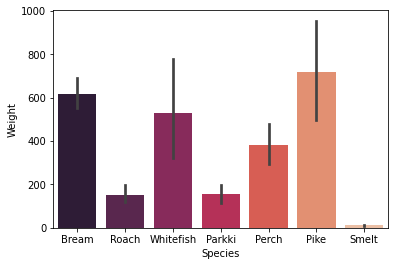

In [9]:
# sns.set_theme(style="white", context="talk")
# plt.figure(figsize=(10, 7))

sns.barplot(df['Species'], df['Weight'], palette="rocket")

<AxesSubplot:xlabel='Species', ylabel='Length1'>

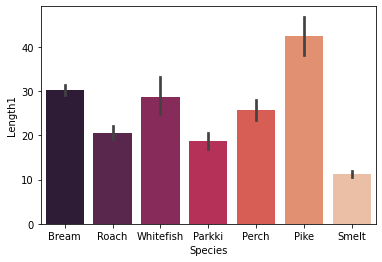

In [10]:
# plt.figure(figsize=(10, 7))

sns.barplot(df['Species'], df['Length1'], palette="rocket")

### Train Test Splitting 

In [11]:
x=df.iloc[:,0:].drop(['Species'], axis = 1)
y=df.Species

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Checking the Outliers and Transformation 

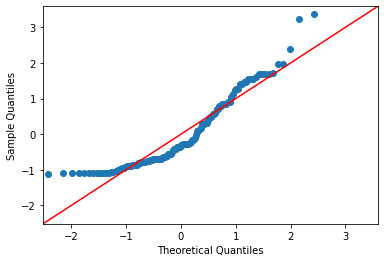

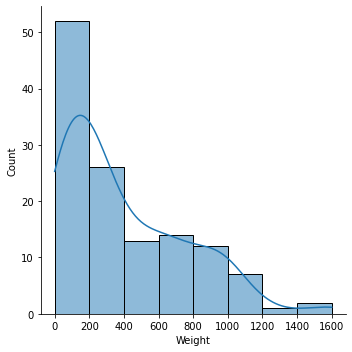

In [13]:
data=x_train.Weight
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

plt.show()

### Transforming the data

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
# Model prediction on train data
pred_train = model.predict(x_train)

In [17]:
# Model Evaluation on training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        26
      Parkki       1.00      1.00      1.00        10
       Perch       1.00      1.00      1.00        44
        Pike       1.00      1.00      1.00        16
       Roach       1.00      1.00      1.00        14
       Smelt       1.00      1.00      1.00        12
   Whitefish       1.00      1.00      1.00         5

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127

[[26  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0 44  0  0  0  0]
 [ 0  0  0 16  0  0  0]
 [ 0  0  0  0 14  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  5]]
Accuracy Score of Model on train data is: 1.0
